In [157]:
#Importing required libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [158]:
# assigning path of eda.csv file to variable eda_data_path
eda_data_path = 'D:\Amazon_Project\exploratory_data_analysis_file.csv'

In [159]:
#Reading csv file
eda_data = pd.read_csv(eda_data_path)

In [160]:
# display top 5 rows
eda_data.head()  

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22-06-2019,Arizona,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29-12-2019,Arizona,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02-03-2019,Arkansas,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12-01-2019,Arkansas,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28-11-2019,Arkansas,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [161]:
#Displaying statistical info of eda data
eda_data.describe() 

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


In [162]:
print(f'Shape of eda data is: {eda_data.shape}')

Shape of eda data is: (500, 16)


In [163]:
#Whether any columns contains null value or not
print(eda_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


In [164]:
#Analyzing datatype of each column
print(eda_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


In [165]:
#Data type of date column is object instead of datetime, So fixing this problem
eda_data.date = pd.to_datetime(eda_data['date'])

In [166]:
print(eda_data.date.dtypes)      

datetime64[ns]


In [167]:
print(eda_data.dtypes)  # Now data in date column is in datetime64 form

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object


In [168]:
#Analyzing order_id
#Checking whether order_id is unique or not
if eda_data.order_id.is_unique:    
    print("Data in order_id is unique")      # execute when 'if' block will true
else:
    print("Data in order_id is not unique")  # execute when 'else' block will true

Data in order_id is unique


In [169]:
#Analyzing nearest_warehouse
eda_data['nearest_warehouse'].unique()

array(['Arizona', 'Arkansas', 'California'], dtype=object)

In [170]:
#Arizona and arizona are same but here they both are different so make it same¶
#Similarly California and california are same
#To solve this problem, convert data in nearest_warehouse in title case
eda_data.nearest_warehouse = eda_data.nearest_warehouse.str.title()

In [171]:
eda_data['nearest_warehouse'].unique()

array(['Arizona', 'Arkansas', 'California'], dtype=object)

In [172]:
#Checking quantities of near_warehouse
warehouses = eda_data['nearest_warehouse'].value_counts()
print(warehouses)

Arizona       197
Arkansas      184
California    119
Name: nearest_warehouse, dtype: int64


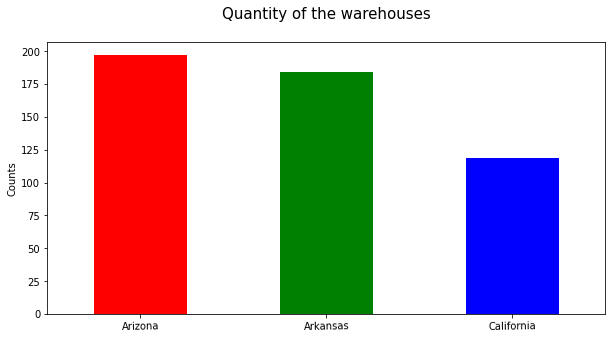

In [173]:
#Visualizing data using bar chart
warehouses.plot(kind='bar', rot=1, color=['r','g','b'], figsize=(10,5))
plt.title("Quantity of the warehouses\n", size=15)
plt.ylabel("Counts");

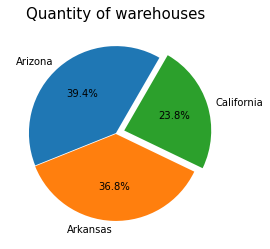

In [174]:
#Visualizing data using pie chart
plt.pie(warehouses,
        labels=['Arizona',"Arkansas",'California'],
        autopct="%0.1f%%",
        explode=[0,.01,0.1],
        startangle=60,radius=1)
plt.title("Quantity of warehouses", size=15)
plt.show()

In [175]:
#It seems that Arizona is nearest warehouse accessible to mostly customer

In [176]:
#Analyzing order_price and order_total
#order_price: Price before any discounts and delivery charges
#order_total: Price after all discounts and/or delivery charges are applied

In [177]:
#Displaying Record whose order price is maximum
eda_data[eda_data.order_price == eda_data.order_price.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Arizona,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


In [178]:
#Displaying Record whose order price is minimum

In [179]:
#Now checking whether the order_total(after all discount and delivery charges are applied) is correct or there is some problem in it
eda_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,10789.79
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


In [180]:
#It looks like that there is an error in order_total feature of eda data, So fixing this¶
order_final_list = list()   

In [181]:
#Computing and appending order_final in 'order_final_list'
for i in range(0,len(eda_data['order_price'])):
    if (eda_data['coupon_discount'][i] != 0):
        dis_price = (eda_data['order_price'][i]) * (eda_data['coupon_discount'][i] / 100)   # apply coupon to original price
        price = dis_price + eda_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(dis_price,2)
        order_final_list.append(final_price)               # appending final_price to order_final_list
    
    else:
        final_price = eda_data['order_price'][i] + eda_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place
        order_final_list.append(final_price)                  # appending final_price to order_final_list


In [182]:
print(f'Items (Price) in list is: {len(order_final_list)}')

Items (Price) in list is: 500


In [183]:
#Converting list to Series and set it in order_total
eda_data['order_total'] = pd.Series(order_final_list)

In [184]:
#Removing outlier
#Using IQR
#Checking for Outlier in order_total
Q1_order_total = eda_data['order_total'].quantile(0.25)     # Lower Quartile
Q3_order_total = eda_data['order_total'].quantile(0.75)     # Upper Quartile

In [185]:
print(f'Lower Quartile is: {Q1_order_total}') 
print(f'Upper Quartile is: {Q3_order_total}')

Lower Quartile is: 860.375
Upper Quartile is: 5020.0


In [186]:
#Finding IQR
# upper quartile - lower quartile

IQR_order_total = Q3_order_total - Q1_order_total    

In [187]:
print(f'Value of IQR_order_total is: {IQR_order_total}')

Value of IQR_order_total is: 4159.625


In [188]:
#Finding lower and upper limit
lower_limit_order_total = Q1_order_total - 1.5 * IQR_order_total
upper_limit_order_total = Q3_order_total + 1.5 * IQR_order_total

In [189]:
print(f'Lower limit of order_total is: {lower_limit_order_total}')
print(f'Upper limit of order_total is: {upper_limit_order_total}')

Lower limit of order_total is: -5379.0625
Upper limit of order_total is: 11259.4375


In [190]:
#Any value less then lower limit and greater then upper limit is outlier
#Displaying all outlier values
outlier_in_eda_data = eda_data[(eda_data['order_total'] < lower_limit_order_total) | (eda_data['order_total'] > upper_limit_order_total)]

In [191]:
outlier_in_eda_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
10,ORD034800,ID4283908179,2019-03-08,California,"[('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...",31895,78.25,-37.811334,145.008678,0,31973.25,Winter,True,1.1919,i love this phone it is so user friendly and t...,True
12,ORD124395,ID0702352304,2019-11-02,Arizona,"[('Alcon 10', 1), ('Universe Note', 1), ('pear...",19010,94.75,-37.805433,144.941333,0,19104.75,Summer,True,0.9509,the cult's alive i love this little dummy-phon...,True
13,ORD255642,ID3085953531,2019-12-24,Arkansas,"[('iAssist Line', 2), ('Alcon 10', 1), ('pearT...",19710,75.64,-37.816166,144.975278,0,19785.64,Summer,True,0.5716,phone had a problem phone seemed great but con...,False
14,ORD496722,ID0589449820,2019-09-04,Arkansas,"[('pearTV', 2), ('iStream', 1), ('Lucent 330S'...",31900,79.78,-37.809463,144.972367,0,31979.78,Autumn,True,66.6483,"five stars good speed, like stanley",True
20,ORD178590,ID6167441029,2019-11-20,Arizona,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",13710,77.61,-37.809311,145.018595,0,13787.61,Spring,False,1.2791,love it. perfect. the battery life is at 94% w...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,ORD033121,ID0777768981,2019-05-17,Arizona,"[('Olivia x460', 1), ('pearTV', 2), ('Universe...",20745,67.67,-37.806155,144.958304,0,20812.67,Autumn,False,1.2259,worth it fantastic worth every penny,True
487,ORD234473,ID0127674021,2019-04-07,Arizona,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",33870,77.06,-37.802392,144.998158,0,33947.06,Winter,True,0.8848,misses phone calls i love the features. you ge...,True
495,ORD475510,ID0247417082,2019-07-08,Arkansas,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,38677.60,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Arkansas,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False


In [192]:
#Above records is outlier, So removing it from original data
print(f'Total outlier records in eda data is: {outlier_in_eda_data.shape[0]}')

Total outlier records in eda data is: 72


In [193]:
#Any data which is greater than lower limit and less than upper limit is Not an Outlier
data_without_outlier = eda_data[(eda_data['order_total'] > lower_limit_order_total) & (eda_data['order_total'] < upper_limit_order_total)]

In [194]:
print(f'Total numbers of records without outliers is: {data_without_outlier.shape[0]}')

Total numbers of records without outliers is: 428


In [195]:
#Displaying top 5 records of data without outliers
data_without_outlier.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Arizona,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,1220.00,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Arizona,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Arkansas,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,1067.00,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Arkansas,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,3720.00,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Arkansas,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,2286.25,Spring,False,0.5867,four stars good,True


In [196]:
#Analyzing how many customers are happy with sevice
data_without_outlier['is_happy_customer'].unique()

array([ True, False])

In [197]:
satisfaction = data_without_outlier['is_happy_customer'].value_counts()
print(satisfaction)

True     301
False    127
Name: is_happy_customer, dtype: int64


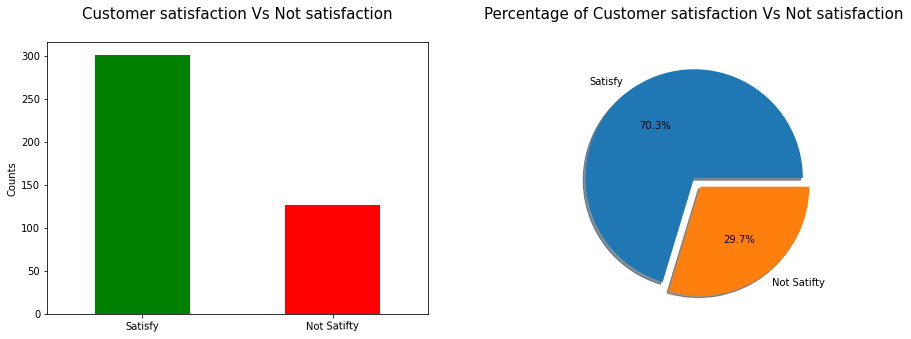

In [198]:
#Visualizing Data
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfy','Not Satifty'])
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)


plt.subplot(122)
plt.pie(satisfaction, labels=['Satisfy','Not Satifty'], autopct="%.1f%%",explode=[0,0.1],shadow=True)
plt.title("Percentage of Customer satisfaction Vs Not satisfaction\n", size=15)

plt.show()

In [199]:
#70.3% customers are satisfy with service